In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

In [2]:
ds = xr.tutorial.load_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 244.0 244.09999 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [3]:
dr = ds['air']  # get a DataArray

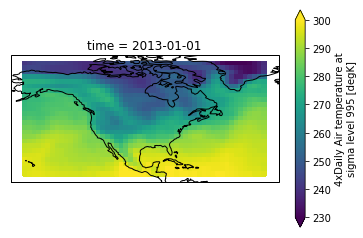

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300)
ax.coastlines()

In [5]:
ds_out = xr.Dataset({'lat': (['lat'], np.arange(15, 75, 2.0)),
                     'lon': (['lon'], np.arange(200, 330, 2.0)),
                    }
                   )
ds_out

<xarray.Dataset>
Dimensions:  (lat: 30, lon: 65)
Coordinates:
  * lat      (lat) float64 15.0 17.0 19.0 21.0 23.0 25.0 27.0 29.0 31.0 33.0 ...
  * lon      (lon) float64 200.0 202.0 204.0 206.0 208.0 210.0 212.0 214.0 ...
Data variables:
    *empty*

In [6]:
regridder = xe.Regridder(ds, ds_out, 'bilinear',periodic=False)
regridder  # print basic regridder information.

Overwrite existing file: bilinear_25x53_30x65.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_25x53_30x65.nc 
Reuse pre-computed weights? False 
Input grid shape:           (25, 53) 
Output grid shape:          (30, 65) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [7]:
dr_out = regridder(dr)
dr_out

<xarray.DataArray 'air' (time: 2920, lat: 30, lon: 65)>
array([[[296.290009,   0.      , ...,   0.      ,   0.      ],
        [295.978009, 296.250532, ..., 296.092623, 295.959375],
        ...,
        [247.519901, 247.653793, ..., 234.206718, 236.912773],
        [243.27991 , 243.937978, ..., 233.815913, 236.104087]],

       [[296.290009,   0.      , ...,   0.      ,   0.      ],
        [296.21799 , 296.683986, ..., 295.729256, 295.625018],
        ...,
        [249.359848, 249.380678, ..., 231.742005, 233.904679],
        [243.299945, 243.717319, ..., 231.806531, 233.319238]],

       ...,

       [[297.790009,   0.      , ...,   0.      ,   0.      ],
        [296.590054, 297.263243, ..., 295.290597, 295.046458],
        ...,
        [257.3898  , 256.92326 , ..., 241.62564 , 243.451145],
        [249.069873, 248.530195, ..., 242.127428, 243.10881 ]],

       [[297.690002,   0.      , ...,   0.      ,   0.      ],
        [296.410046, 296.987255, ..., 295.827016, 295.69049 ],
    

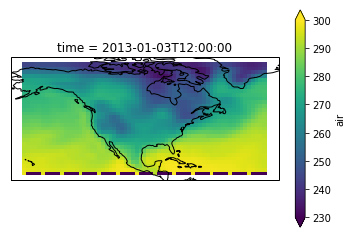

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out.isel(time=10).plot.pcolormesh(ax=ax, vmin=230, vmax=300);
ax.coastlines();